In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/nathanlapierre/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def read_method_results(fname, field = 'Beta Perm. P-value', qtltools=False):
    if(qtltools):
        df = pd.read_csv(fname, sep=' ', header=None)
        pvals = df[:][20]
    else:
        df = pd.read_csv(fname, sep='\t')
        pvals = df[field]
    pvals = [i if i > 1e-17 else 1e-17 for i in pvals]
    nl10_pvals = np.sort(-np.log10(pvals))
    return(nl10_pvals)

In [3]:
def multi_qq_plot(pval_df, xmax=10, ymax=17.3):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(12,12))
    for i in range(pval_df.shape[1]):
        method = pval_df.columns[i]
        n = len(all_pvals_chr[method].dropna())
        x_ticks = [-np.log10((n-i)/n) for i in range(n)]
        ax.scatter(x_ticks, pval_df[method].dropna(), label=method)

    #xmax, ymax = 5, 10
    #ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
    ax.plot([0, ymax], [0, xmax], transform=ax.transAxes, color='red')
    plt.xlim(-0.3, xmax)
    plt.ylim(-0.3, ymax)
    plt.xlabel('Expected -log10(pvals)')
    plt.ylabel('Observed -log10(pvals)')
    plt.legend(prop={'size': 16})
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    return fig

In [4]:
ftest_pvals_allchr = read_method_results('printall/all_chr_geuvadis/results_ftest.tsv')
fisher_perm_pvals_allchr = read_method_results('printall/all_chr_geuvadis/results_fisher.tsv')
qtltools_sum_pvals_allchr = read_method_results('printall_qtltools/all_chr_geuvadis/results_min.tsv')

#ftest_pvals_allchr = read_method_results('printall/geuvadis_chr21/results_chr_21.ftest.tsv')
#fisher_perm_pvals_allchr = read_method_results('printall/geuvadis_chr21/results_chr_21.fisher.tsv')
#qtltools_sum_pvals_allchr = read_method_results('printall_qtltools/geuvadis_chr21/results_chr_21.min.tsv')


In [5]:
all_pvals_chr = [ftest_pvals_allchr, fisher_perm_pvals_allchr, qtltools_sum_pvals_allchr]

In [16]:
expect_med = -np.log10(0.5)

ftest_med = np.median(ftest_pvals_allchr)
fisher_med = np.median(fisher_perm_pvals_allchr)
qtl_med = np.median(qtltools_sum_pvals_allchr)

ftest_med_ratio = np.median(ftest_pvals_allchr / expect_med)
fisher_med_ratio = np.median(fisher_perm_pvals_allchr / expect_med)
qtl_med_ratio = np.median(qtltools_sum_pvals_allchr / expect_med)

ftest_90pct = np.quantile(ftest_pvals_allchr, 0.9)
fisher_90pct = np.quantile(fisher_perm_pvals_allchr, 0.9)
qtl_90pct = np.quantile(qtltools_sum_pvals_allchr, 0.9)

print('F-test median: ' + str(ftest_med))
print('Fisher_perm median: ' + str(fisher_med))
print('QTLtools-sum median: ' + str(qtl_med))
print('')
print('Ratios vs expected median: ')
print('F-test median: ' + str(ftest_med_ratio))
print('Fisher_perm median: ' + str(fisher_med_ratio))
print('QTLtools-sum median: ' + str(qtl_med_ratio))
print('')
print('F-test 90th percentile: ' + str(ftest_90pct))
print('Fisher_perm 90th percentile: ' + str(fisher_90pct))
print('QTLtools-sum 90th percentile: ' + str(qtl_90pct))


F-test median: 0.39062332611917594
Fisher_perm median: 0.3743974302191374
QTLtools-sum median: 0.35400232791194586

Ratios vs expected median: 
F-test median: 1.297622601553639
Fisher_perm median: 1.2437213420985833
QTLtools-sum median: 1.1759702787462216

F-test 90th percentile: 1.4859239852287345
Fisher_perm 90th percentile: 1.5716299728357055
QTLtools-sum 90th percentile: 1.309985297945695


In [69]:
all_pvals_chr = pd.DataFrame(all_pvals_chr).transpose()
all_pvals_chr.columns = ['F-test', 'Fisher_perm', 'QTLtools-sum']
all_pvals_chr.head(5)

,F-test,Fisher_perm,QTLtools-sum
0,-0.0,-0.0,-0.0
1,-0.0,-0.0,-0.0
2,-0.0,-0.0,-0.0
3,-0.0,-0.0,-0.0
4,-0.0,-0.0,-0.0


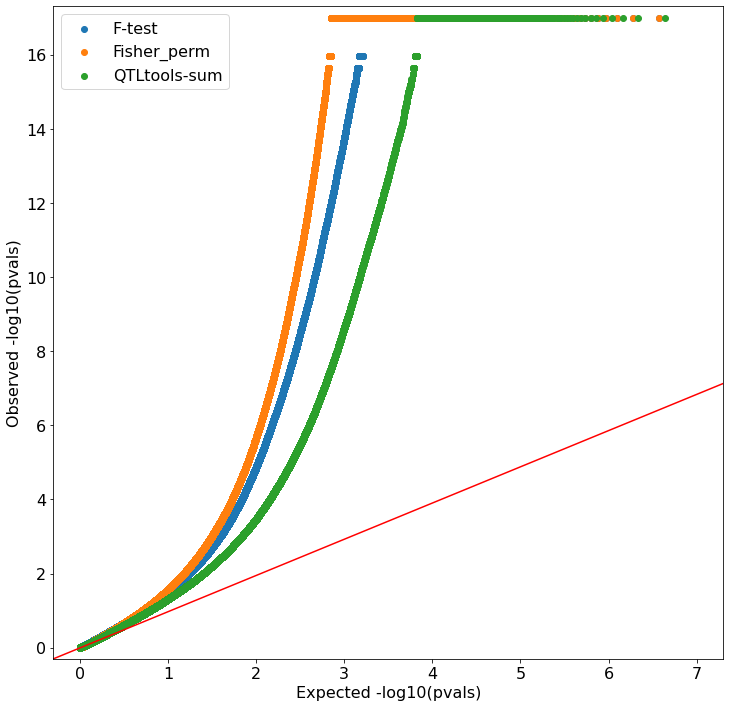

In [75]:
qqfig = multi_qq_plot(all_pvals_chr, xmax=7.3, ymax=17.3)

In [76]:
qqfig.savefig('qq_all_eqtl-egene_pairs.png')